In [ ]:
!pip install crossfire[geodf] contextily -q

In [ ]:
# Bibliotecas
import geopandas as gpd
from crossfire import occurrences, AsyncClient
from crossfire.clients.occurrences import flatten
from shapely.geometry import Point
import folium
from folium import plugins
import matplotlib.pyplot as plt
import contextily as ctx

In [ ]:
# Baixando dados com asyncio
client = AsyncClient(email="email", password="senha")
await client.states()
await client.cities(city_name='Recife')
df = await client.occurrences('813ca36b-91e3-4a18-b408-60b27a1942ef', format='geodf',flat=True)


Loading pages: 0page [00:00, ?page/s]
Loading pages:  23%|██▎       | 48/206 [01:49<06:00,  2.28s/page]

Loading pages: 100%|██████████| 206/206 [02:52<00:00,  1.19page/s]


In [ ]:
# Filtrando por bairro
df_query = df.query('neighborhood_name == "MURIBECA"')

In [ ]:
# Criar uma geometria de ponto usando Shapely
geometry = [Point(xy) for xy in zip(df_query['longitude'].astype(float), df_query['latitude'].astype(float))]

# Criar um GeoDataFrame
geo_df = gpd.GeoDataFrame(df_query, geometry=geometry)

In [ ]:
# Função para visualização
def vis(gdf, coluna):
  fig, ax = plt.subplots(figsize=(15,10))
  gdf.plot(ax=ax, column=coluna, cmap='Paired_r', legend=True)
  return ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf.crs)

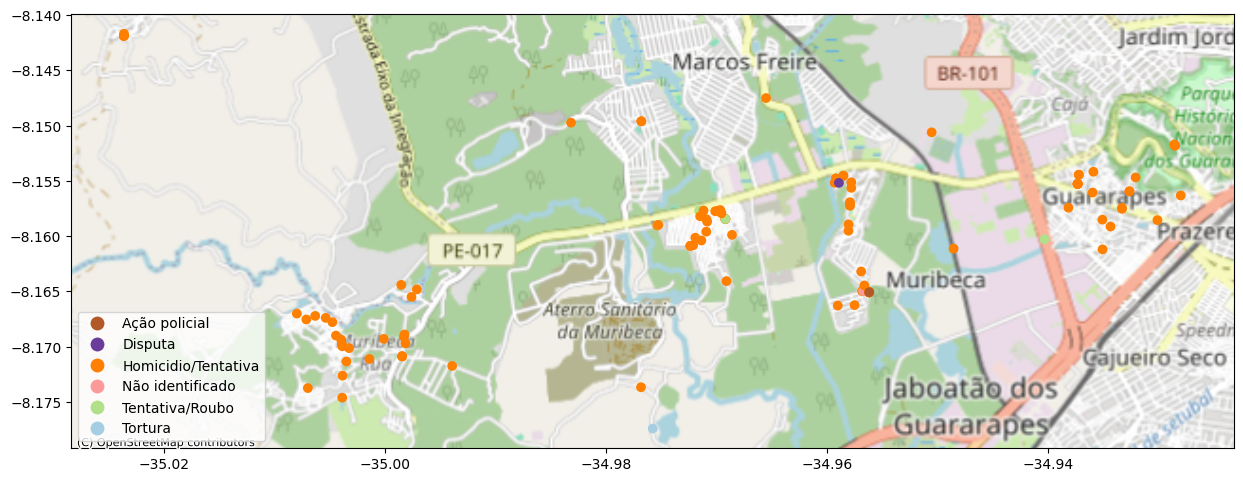

In [ ]:
# Visualizando resultado
vis(df_query,'contextInfo_mainReason_name')